In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [89]:
emp_data=pd.read_csv('Data/HR_comma_sep.csv.txt')

In [90]:
emp_data.head()
emp_data.rename(columns={'sales':'dept'},inplace=True)
emp_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [91]:
emp_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [92]:
#preprocessing
#object data type
cat_cols=emp_data.select_dtypes('object').columns
cat_cols

Index(['dept', 'salary'], dtype='object')

In [93]:
emp_data.dept.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [94]:
#department done
le=LabelEncoder()
dept=le.fit_transform(emp_data.dept)
ohe=OneHotEncoder()
ohe_dept=ohe.fit_transform(dept.reshape(-1,1))
dept_df=pd.DataFrame(ohe_dept.toarray(),dtype=int,columns=le.classes_)

/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [95]:
#salary done
emp_data['salary_tf']=emp_data.salary.map({'low':1,'medium':2,'high':3})

In [96]:
print(emp_data.columns)
emp_data.head()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary', 'salary_tf'],
      dtype='object')


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,salary_tf
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


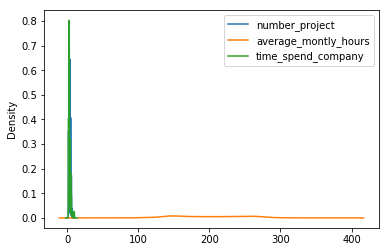

In [97]:
df=emp_data[['number_project','average_montly_hours', 'time_spend_company']]
df.plot.kde()

In [98]:
mm=MinMaxScaler()
scaled_np=mm.fit_transform(df)
dept_np=dept_df.values
emp_df = emp_data[['satisfaction_level','last_evaluation','Work_accident','promotion_last_5years','salary_tf']]
emp_np=emp_df.values

/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [99]:
feature_data=np.hstack([emp_np,scaled_np,dept_np])
target_data=emp_data.left

In [100]:
print(feature_data.shape)
print(target_data.value_counts())

(14999, 18)
0    11428
1     3571
Name: left, dtype: int64


In [101]:
#model building
from sklearn.linear_model import LogisticRegression,SGDClassifier,PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier

In [102]:
models=[LogisticRegression(class_weight='balanced'),SGDClassifier(max_iter=10),PassiveAggressiveClassifier(max_iter=20),
       RandomForestClassifier(n_estimators=100)]

In [103]:
trainx,testx,trainy,testy=train_test_split(feature_data,target_data)
for model in models:
    model.fit(trainx,trainy)
    print(model.score(testx,testy))

/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7501333333333333
0.7338666666666667
0.46266666666666667
0.9898666666666667
